 **Import Libraries**

In [19]:
import csv
import json
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Bidirectional, GlobalAveragePooling1D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [20]:
# Load Dataset
with open("Reviews.json", 'r') as f:
  datastore = json.load(f)
sentences = []
labels = []

for item in datastore:
  sentences.append(item['Reviews'])
  labels.append(item['is_positive?'])

In [21]:
# Declare Variables
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 151
early_stop = EarlyStopping(monitor='loss', min_delta=0, patience=20, verbose=2)
num_epochs = 1000

In [22]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

**Tokenize**

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

In [24]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
max_length = max(len(sequence) for sequence in training_sequences)

training_padded = pad_sequences(training_sequences,
                                maxlen=max_length,
                                padding=padding_type,
                                truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,
                               maxlen=max_length,
                               padding=padding_type,
                               truncating=trunc_type)

In [25]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


**Create Model for BILSTM, LSTM and GRU**

In [26]:
def create_model(model_type):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
    
    if model_type == "biLSTM":
        model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True)))
    elif model_type == "LSTM":
        model.add(tf.keras.layers.LSTM(150, return_sequences=True))
    elif model_type == "GRU":
        model.add(tf.keras.layers.GRU(150, return_sequences=True))
    
    model.add(tf.keras.layers.GlobalAveragePooling1D())
    model.add(tf.keras.layers.De    nse(24, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    return model

biLSTM_model = create_model("biLSTM")
LSTM_model = create_model("LSTM")
GRU_model = create_model("GRU")

LSTM_model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
GRU_model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
biLSTM_model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


**Train BILSTM**

In [27]:
biLSTM_history = biLSTM_model.fit(training_padded,
                    training_labels,
                    epochs=num_epochs,
                    validation_data = (testing_padded, testing_labels),
                    verbose=2, callbacks=[early_stop])

Epoch 1/1000
5/5 - 26s - loss: 0.6535 - accuracy: 0.8808 - val_loss: 0.5288 - val_accuracy: 0.9508 - 26s/epoch - 5s/step
Epoch 2/1000
5/5 - 1s - loss: 0.5251 - accuracy: 0.8808 - val_loss: 0.2249 - val_accuracy: 0.9508 - 1s/epoch - 232ms/step
Epoch 3/1000
5/5 - 1s - loss: 0.4101 - accuracy: 0.8808 - val_loss: 0.3412 - val_accuracy: 0.9508 - 1s/epoch - 226ms/step
Epoch 4/1000
5/5 - 1s - loss: 0.4159 - accuracy: 0.8808 - val_loss: 0.2720 - val_accuracy: 0.9508 - 1s/epoch - 227ms/step
Epoch 5/1000
5/5 - 1s - loss: 0.3935 - accuracy: 0.8808 - val_loss: 0.2113 - val_accuracy: 0.9508 - 1s/epoch - 224ms/step
Epoch 6/1000
5/5 - 1s - loss: 0.3793 - accuracy: 0.8808 - val_loss: 0.2282 - val_accuracy: 0.9508 - 1s/epoch - 215ms/step
Epoch 7/1000
5/5 - 1s - loss: 0.3773 - accuracy: 0.8808 - val_loss: 0.2488 - val_accuracy: 0.9508 - 1s/epoch - 207ms/step
Epoch 8/1000
5/5 - 1s - loss: 0.3695 - accuracy: 0.8808 - val_loss: 0.2253 - val_accuracy: 0.9508 - 1s/epoch - 219ms/step
Epoch 9/1000
5/5 - 1s - l

**Train LSTM**

In [28]:
LSTM_history = LSTM_model.fit(training_padded,
                    training_labels,
                    epochs=num_epochs,
                    validation_data = (testing_padded, testing_labels),
                    verbose=2, callbacks=[early_stop])

Epoch 1/1000
5/5 - 11s - loss: 0.6735 - accuracy: 0.7417 - val_loss: 0.6129 - val_accuracy: 0.9508 - 11s/epoch - 2s/step
Epoch 2/1000
5/5 - 1s - loss: 0.5456 - accuracy: 0.8808 - val_loss: 0.2103 - val_accuracy: 0.9508 - 721ms/epoch - 144ms/step
Epoch 3/1000
5/5 - 1s - loss: 0.3863 - accuracy: 0.8808 - val_loss: 0.2295 - val_accuracy: 0.9508 - 655ms/epoch - 131ms/step
Epoch 4/1000
5/5 - 1s - loss: 0.3763 - accuracy: 0.8808 - val_loss: 0.2447 - val_accuracy: 0.9508 - 647ms/epoch - 129ms/step
Epoch 5/1000
5/5 - 1s - loss: 0.3674 - accuracy: 0.8808 - val_loss: 0.2205 - val_accuracy: 0.9508 - 636ms/epoch - 127ms/step
Epoch 6/1000
5/5 - 1s - loss: 0.3677 - accuracy: 0.8808 - val_loss: 0.2125 - val_accuracy: 0.9508 - 632ms/epoch - 126ms/step
Epoch 7/1000
5/5 - 1s - loss: 0.3648 - accuracy: 0.8808 - val_loss: 0.2218 - val_accuracy: 0.9508 - 644ms/epoch - 129ms/step
Epoch 8/1000
5/5 - 1s - loss: 0.3638 - accuracy: 0.8808 - val_loss: 0.2303 - val_accuracy: 0.9508 - 696ms/epoch - 139ms/step
Epoc

**Train GRU**

In [31]:
GRU_history = GRU_model.fit(training_padded,
                    training_labels,
                    epochs=num_epochs, 
                    validation_data = (testing_padded, testing_labels),
                    verbose=2, callbacks=[early_stop])

Epoch 1/1000
5/5 - 5s - loss: 2.8701e-06 - accuracy: 1.0000 - val_loss: 0.1698 - val_accuracy: 0.9836 - 5s/epoch - 1s/step
Epoch 2/1000
5/5 - 1s - loss: 2.8513e-06 - accuracy: 1.0000 - val_loss: 0.1699 - val_accuracy: 0.9836 - 635ms/epoch - 127ms/step
Epoch 3/1000
5/5 - 1s - loss: 2.8378e-06 - accuracy: 1.0000 - val_loss: 0.1700 - val_accuracy: 0.9836 - 558ms/epoch - 112ms/step
Epoch 4/1000
5/5 - 1s - loss: 2.8216e-06 - accuracy: 1.0000 - val_loss: 0.1701 - val_accuracy: 0.9836 - 635ms/epoch - 127ms/step
Epoch 5/1000
5/5 - 1s - loss: 2.8052e-06 - accuracy: 1.0000 - val_loss: 0.1702 - val_accuracy: 0.9836 - 697ms/epoch - 139ms/step
Epoch 6/1000
5/5 - 1s - loss: 2.7889e-06 - accuracy: 1.0000 - val_loss: 0.1703 - val_accuracy: 0.9836 - 689ms/epoch - 138ms/step
Epoch 7/1000
5/5 - 1s - loss: 2.7742e-06 - accuracy: 1.0000 - val_loss: 0.1704 - val_accuracy: 0.9836 - 580ms/epoch - 116ms/step
Epoch 8/1000
5/5 - 1s - loss: 2.7568e-06 - accuracy: 1.0000 - val_loss: 0.1705 - val_accuracy: 0.9836 -

**Graphs for Accuracy, Loss of each Model**

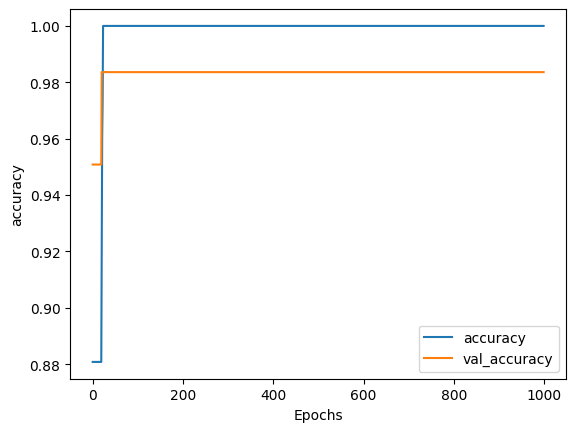

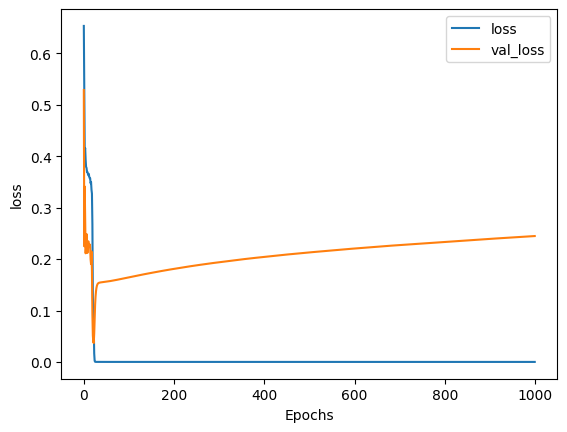

In [32]:
# BiLSTM History
def plot_graphs(biLSTM_history, string):
  plt.plot(biLSTM_history.history[string])
  plt.plot(biLSTM_history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(biLSTM_history, "accuracy")
plot_graphs(biLSTM_history, "loss")

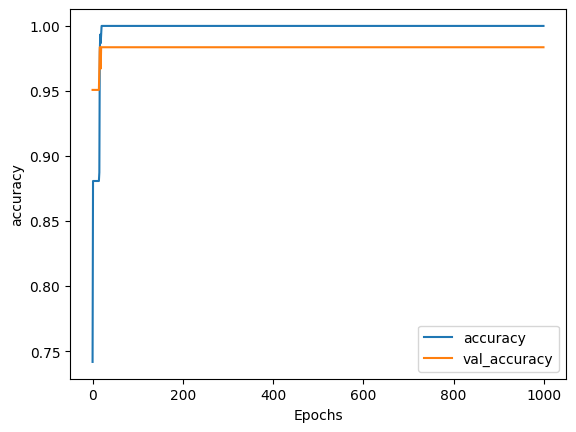

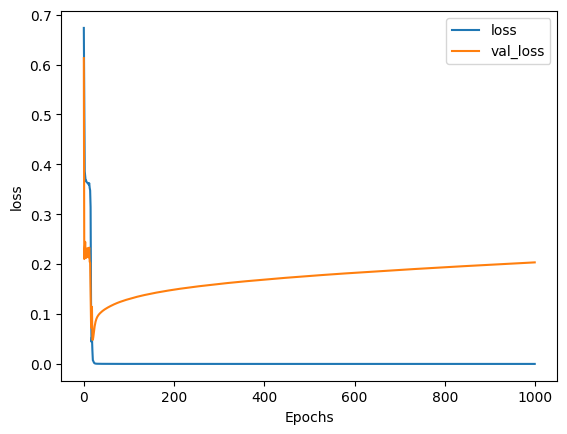

In [33]:
# LSTM History
def plot_graphs(LSTM_history, string):
  plt.plot(LSTM_history.history[string])
  plt.plot(LSTM_history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(LSTM_history, "accuracy")
plot_graphs(LSTM_history, "loss")

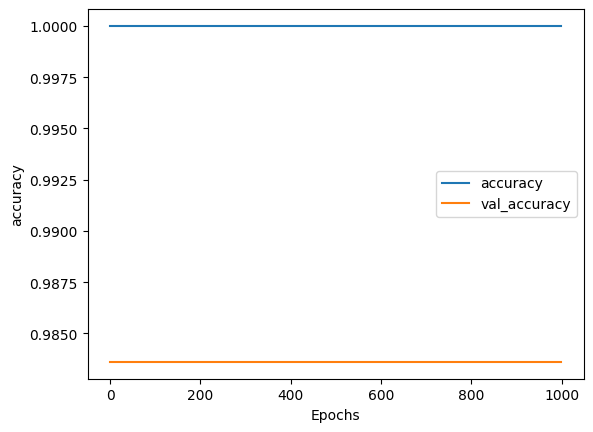

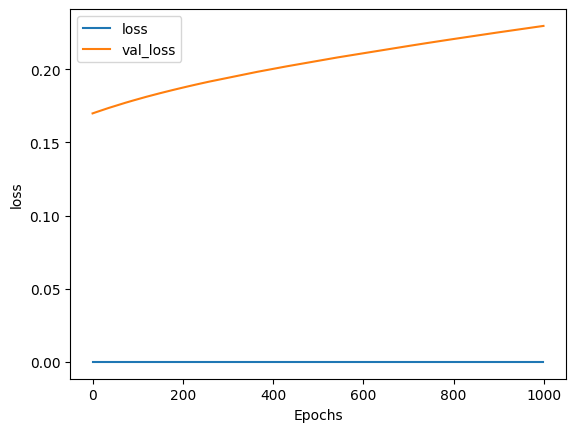

In [34]:
# GRU History
def plot_graphs(GRU_history, string):
  plt.plot(GRU_history.history[string])
  plt.plot(GRU_history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(GRU_history, "accuracy")
plot_graphs(GRU_history, "loss")

In [35]:
biLSTM_e = biLSTM_model.layers[0]
LSTM_e = LSTM_model.layers[0]
GRU_e = GRU_model.layers[0]

biLSTM_weights = biLSTM_e.get_weights()[0]
LSTM_weights = LSTM_e.get_weights()[0]
GRU_weights = GRU_e.get_weights()[0]

threshold=0.5

**Save to H5 file**

In [36]:
# Save to H5
biLSTM_model.save("biLSTM_model.h5")
LSTM_model.save("LSTM_model.h5")
GRU_model.save("GRU_model.h5")

# Load saved model
from tensorflow.keras.models import load_model

biLSTM_model = load_model("biLSTM_model.h5")
LSTM_model = load_model("LSTM_model.h5")
GRU_model = load_model("GRU_model.h5")

**Evaluate, Accuracy and Loss**

In [37]:
biLSTM_loss, biLSTM_accuracy = biLSTM_model.evaluate(testing_padded, testing_labels)
LSTM_loss, LSTM_accuracy = LSTM_model.evaluate(testing_padded, testing_labels)
GRU_loss, GRU_accuracy = GRU_model.evaluate(testing_padded, testing_labels)

# Print the accuracy scores
print("biLSTM Accuracy:", biLSTM_accuracy)
print("LSTM Accuracy:", LSTM_accuracy)
print("GRU Accuracy:", GRU_accuracy)

2/2 [==============================] - 1s 78ms/step - loss: 0.2296 - accuracy: 0.9836
biLSTM Accuracy: 0.9836065769195557
LSTM Accuracy: 0.9836065769195557
GRU Accuracy: 0.9836065769195557


**Function to classify texts**

In [43]:
def predict(sentence, tokenizer, max_length, padding_type, trunc_type, biLSTM_model, LSTM_model, GRU_model, threshold):
    sequences = tokenizer.texts_to_sequences(sentence)
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    biLSTM_pred = biLSTM_model.predict(padded)
    LSTM_pred = LSTM_model.predict(padded)
    GRU_pred = GRU_model.predict(padded)

    # If greater than threshold positive, otherwise negative
    for i, sentence in enumerate(sentence):
        biLSTM_label = "Positive" if biLSTM_pred[i][0] > threshold else "Negative"
        LSTM_label = "Positive" if LSTM_pred[i][0] > threshold else "Negative"
        GRU_label = "Positive" if GRU_pred[i][0] > threshold else "Negative"

        # Print Predictions
        print("Classification")
        print(f"Sentence: {sentence}")

        print(f"BILSTM Class: {biLSTM_label}")
        print(f"BILSTM Probability: {biLSTM_pred[i][0]:.9f}")
        print()

        print(f"LSTM Class: {LSTM_label}")
        print(f"LSTM Probability: {LSTM_pred[i][0]:.9f}")
        print()

        print(f"GRU Class: {GRU_label}")
        print(f"GRU Probability: {GRU_pred[i][0]:.9f}")
        print()


In [44]:
sentence = input("Enter sentences separated by commas: ")
sentence = sentence.split(',')

predict(sentence, tokenizer, max_length, padding_type, trunc_type, biLSTM_model, LSTM_model, GRU_model, threshold)


1/1 [==============================] - 0s 66ms/step
Classification
Sentence: bad service
BILSTM Class: Negative
BILSTM Probability: 0.000000146

LSTM Class: Negative
LSTM Probability: 0.000001303

GRU Class: Negative
GRU Probability: 0.000000409



In [ ]:
import pickle

pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))


In [ ]:
import pickle
import json


# Save the other values to a JSON file
data = {
    'max_length': max_length,
    'padding_type': padding_type,
    'trunc_type': trunc_type,
    'threshold': threshold
}

with open('data.json', 'w') as file:
    json.dump(data, file)
